In [362]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# DATA PREP

Uploading the data

In [363]:
import dask.dataframe as dd
df1 = pd.read_csv(r"Desktop\df_2019_q4.csv")
df2 = pd.read_csv(r"Desktop\customers.csv", sep='|')

In [364]:
df1.head()

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,year,quarter
0,16,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:08:05,1577302685,grocery_pos,12.78,1,fraud_Bauch-Raynor,41.622025,-74.287152,2019,4
1,17,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:33:53,1577304233,grocery_pos,13.74,1,fraud_Wolf Inc,40.405458,-74.299585,2019,4
2,18,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,03:26:31,1577310991,grocery_pos,9.41,1,"fraud_Schultz, Simonis and Little",40.050169,-74.325142,2019,4
3,19,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:05:28,1577302528,gas_transport,277.84,1,fraud_Torp-Labadie,40.328734,-72.938980,2019,4
4,20,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,09:47:00,1577333820,gas_transport,299.67,1,fraud_Emard Inc,41.670631,-74.218224,2019,4


In [365]:
df1.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'quarter'],
      dtype='object')

In [366]:
df2.columns

Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')

In [367]:
# Get the common column names
common_columns = df1.columns.intersection(df2.columns)

# Display the common columns
print("Common columns:", common_columns)

Common columns: Index(['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'],
      dtype='object')


### Merging tables 
Inner Join                                                                                                                        
This type of merge returns only the rows where there is a match between the two dataframes.<br>                                      
Outer Join      <br>                                                                                                              This type of merge returns all rows from both dataframes, and fills in NaN where there are no matches.

In [368]:
# Merge the dataframes on common columns without duplicating columns
merged_df= pd.merge(df1, df2, on=['ssn', 'cc_num', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'acct_num', 'profile'], how='inner')

# # Save the merged dataframe to a new CSV file
# merged_df.to_csv('merged_fraud_detection.csv', index=False)

# Display the first few rows of the merged dataframe
merged_df

,Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,...,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,year,quarter
0,16,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:08:05,1577302685,grocery_pos,12.78,1,fraud_Bauch-Raynor,41.622025,-74.287152,2019,4
1,17,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:33:53,1577304233,grocery_pos,13.74,1,fraud_Wolf Inc,40.405458,-74.299585,2019,4
2,18,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,03:26:31,1577310991,grocery_pos,9.41,1,"fraud_Schultz, Simonis and Little",40.050169,-74.325142,2019,4
3,19,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,01:05:28,1577302528,gas_transport,277.84,1,fraud_Torp-Labadie,40.328734,-72.938980,2019,4
4,20,077-66-9719,6569371776571759,Judith,Long,F,501 Bullock Port Suite 284,Port Washington,NY,11050,...,09:47:00,1577333820,gas_transport,299.67,1,fraud_Emard Inc,41.670631,-74.218224,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10478183,34636332,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,19:28:21,1608040701,travel,3.83,0,fraud_Lynch-Mohr,35.893517,-77.055651,2020,4
10478184,34636336,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,17:00:31,1608982231,travel,8.69,0,fraud_Ebert-Daugherty,35.750875,-75.477016,2020,4
10478185,34636339,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,20:44:07,1608995647,travel,1.59,0,"fraud_Monahan, Hermann and Johns",37.143014,-76.603130,2020,4
10478186,34636341,198-77-7126,6011074559874044,Kevin,Dunn,M,21431 Daniel Canyon,Chesapeake,VA,23320,...,12:58:00,1605684480,personal_care,7.34,0,fraud_Baumbach Ltd,37.227638,-75.954500,2020,4


In [369]:
merged_df.columns

Index(['Unnamed: 0', 'ssn', 'cc_num', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'acct_num', 'profile', 'trans_num', 'trans_date', 'trans_time',
       'unix_time', 'category', 'amt', 'is_fraud', 'merchant', 'merch_lat',
       'merch_long', 'year', 'quarter'],
      dtype='object')

In [370]:
merged_df.describe()

,Unnamed: 0,cc_num,zip,lat,long,city_pop,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long,year,quarter
count,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,1.047819e+07,10478188.0
mean,1.731938e+07,3.702906e+17,5.108769e+04,3.757636e+01,-9.193568e+01,2.964466e+05,4.975395e+11,1.590247e+09,6.646663e+01,4.383869e-03,3.757624e+01,-9.193554e+01,2.019498e+03,4.0
std,9.998740e+06,1.235095e+18,2.968729e+04,5.186278e+00,1.646782e+01,5.700189e+05,2.890842e+11,1.596677e+07,1.830386e+02,6.606550e-02,5.218047e+00,1.647770e+01,4.999949e-01,0.0
min,1.600000e+01,6.040003e+10,1.002000e+03,1.958930e+01,-1.631189e+02,4.400000e+01,1.837412e+07,1.569868e+09,1.000000e+00,0.000000e+00,1.858999e+01,-1.641144e+02,2.019000e+03,4.0
25%,8.659768e+06,3.848028e+13,2.758700e+04,3.389940e+01,-9.854400e+01,1.781300e+04,2.462743e+11,1.575119e+09,7.900000e+00,0.000000e+00,3.386532e+01,-9.879683e+01,2.019000e+03,4.0
50%,1.732219e+07,3.505886e+15,4.809700e+04,3.858780e+01,-8.703800e+01,6.106000e+04,4.963046e+11,1.577793e+09,3.349000e+01,0.000000e+00,3.845401e+01,-8.697753e+01,2.019000e+03,4.0
75%,2.597678e+07,4.588532e+15,7.824700e+04,4.123380e+01,-7.995370e+01,2.368230e+05,7.499406e+11,1.606726e+09,7.799000e+01,0.000000e+00,4.130718e+01,-7.971002e+01,2.020000e+03,4.0
max,3.463634e+07,4.999689e+18,9.992900e+04,6.669330e+01,-6.740730e+01,2.906700e+06,9.999583e+11,1.609439e+09,4.167949e+04,1.000000e+00,6.769078e+01,-6.640901e+01,2.020000e+03,4.0


# Convert an objects into viable data 
(string, int, float....)

In [387]:
df=merged_df.copy()

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478188 entries, 0 to 10478187
Data columns (total 29 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ssn         object 
 2   cc_num      int64  
 3   first       object 
 4   last        object 
 5   gender      object 
 6   street      object 
 7   city        object 
 8   state       object 
 9   zip         int64  
 10  lat         float64
 11  long        float64
 12  city_pop    int64  
 13  job         object 
 14  dob         object 
 15  acct_num    int64  
 16  profile     object 
 17  trans_num   object 
 18  trans_date  object 
 19  trans_time  object 
 20  unix_time   int64  
 21  category    object 
 22  amt         float64
 23  is_fraud    int64  
 24  merchant    object 
 25  merch_lat   float64
 26  merch_long  float64
 27  year        int64  
 28  quarter     int64  
dtypes: float64(5), int64(9), object(15)
memory usage: 2.3+ GB


In [389]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
16          1
23090678    1
23090649    1
23090652    1
23090654    1
           ..
11550113    1
11550119    1
11550125    1
11550126    1
34636345    1
Name: count, Length: 10478188, dtype: int64

In [390]:
df = df.drop("Unnamed: 0", axis=1)

In [391]:
df['ssn']=df['ssn'].astype('string')

In [392]:
df['ssn']=df['ssn'].str.replace('-',' ')

In [393]:
# df['gender']=df['gender'].astype('string')

In [394]:
df['street']=df['street'].astype('string')
df['street']=df['street'].str.replace('.','')

In [395]:
df['job']=df['job'].astype('string')
df['job']=df['job'].str.replace('(','')
df['job']=df['job'].str.replace(')','')

In [396]:
df['job']=df['job'].str.replace(',',' ')

In [397]:
df['profile']=df['profile'].str.replace('_',' ')

# Covert columns

In [398]:
#!pip install string
import string

In [399]:
# 'Object' Columns to convert to string
columns_to_convert = df.select_dtypes(include=['object']).columns
print(columns_to_convert)

# Convert specified columns to string type and create string_df
string_df = df[columns_to_convert].astype('category')

# # Convert specified columns to string type and create string_df
# string_df = df[columns_to_convert].astype('string')

# Assign the cleaned columns back to the original DataFrame
df[columns_to_convert] = string_df

Index(['first', 'last', 'gender', 'city', 'state', 'dob', 'profile',
       'trans_num', 'trans_date', 'trans_time', 'category', 'merchant'],
      dtype='object')


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478188 entries, 0 to 10478187
Data columns (total 28 columns):
 #   Column      Dtype   
---  ------      -----   
 0   ssn         string  
 1   cc_num      int64   
 2   first       category
 3   last        category
 4   gender      category
 5   street      string  
 6   city        category
 7   state       category
 8   zip         int64   
 9   lat         float64 
 10  long        float64 
 11  city_pop    int64   
 12  job         string  
 13  dob         category
 14  acct_num    int64   
 15  profile     category
 16  trans_num   category
 17  trans_date  category
 18  trans_time  category
 19  unix_time   int64   
 20  category    category
 21  amt         float64 
 22  is_fraud    int64   
 23  merchant    category
 24  merch_lat   float64 
 25  merch_long  float64 
 26  year        int64   
 27  quarter     int64   
dtypes: category(12), float64(5), int64(8), string(3)
memory usage: 1.8 GB


Changing values

In [401]:
df['gender'].value_counts()

gender
F    5423417
M    5054771
Name: count, dtype: int64

In [402]:
# We can replace df['gender'] values to avoid risk of changing the values in other columns
df=df.replace(to_replace="F", value="0") 
df=df.replace(to_replace="M", value="1")

In [403]:
df['gender'].value_counts()

gender
0    5423417
1    5054771
Name: count, dtype: int64

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478188 entries, 0 to 10478187
Data columns (total 28 columns):
 #   Column      Dtype   
---  ------      -----   
 0   ssn         string  
 1   cc_num      int64   
 2   first       category
 3   last        category
 4   gender      category
 5   street      string  
 6   city        category
 7   state       category
 8   zip         int64   
 9   lat         float64 
 10  long        float64 
 11  city_pop    int64   
 12  job         string  
 13  dob         category
 14  acct_num    int64   
 15  profile     category
 16  trans_num   category
 17  trans_date  category
 18  trans_time  category
 19  unix_time   int64   
 20  category    category
 21  amt         float64 
 22  is_fraud    int64   
 23  merchant    category
 24  merch_lat   float64 
 25  merch_long  float64 
 26  year        int64   
 27  quarter     int64   
dtypes: category(12), float64(5), int64(8), string(3)
memory usage: 1.8 GB


# Pickle file
A pickle file in Python is used to serialize and deserialize Python objects.
Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network.
Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [405]:
df.to_pickle('mrg_df_after_data_prep_3.1.25.pkl')
df=pd.read_pickle('mrg_df_after_data_prep_3.1.25.pkl')

In [406]:
import pickle

#Write a pickle file
with open('df_3.1.25.pkl', 'wb') as f:
    pickle.dump(df, f)

print("df_3.1.25 dataset saved as a pickle file.")

df_3.1.25 dataset saved as a pickle file.


In [407]:
import pickle

#Read a pickle file and load the data
with open('df_3.1.25.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [408]:
# loaded_data

# Clean Text

In [32]:
df = loaded_data.copy()

In [409]:
df.to_pickle('df_3.1.25_2.pkl')

In [410]:
df = pd.read_pickle('df_3.1.25_2.pkl')

In [ ]:
# # Convert specified columns to string type and create string_df
# string_df = df[columns_to_convert].astype(str)

# # Remove punctuation in one line
# string_df = string_df.applymap(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# # Assign the cleaned columns back to the original DataFrame
# df[columns_to_convert] = string_df

# # Display the resulting DataFrame
# df

In [411]:
df = df.drop(["trans_num","quarter"], axis=1)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478188 entries, 0 to 10478187
Data columns (total 26 columns):
 #   Column      Dtype   
---  ------      -----   
 0   ssn         string  
 1   cc_num      int64   
 2   first       category
 3   last        category
 4   gender      category
 5   street      string  
 6   city        category
 7   state       category
 8   zip         int64   
 9   lat         float64 
 10  long        float64 
 11  city_pop    int64   
 12  job         string  
 13  dob         category
 14  acct_num    int64   
 15  profile     category
 16  trans_date  category
 17  trans_time  category
 18  unix_time   int64   
 19  category    category
 20  amt         float64 
 21  is_fraud    int64   
 22  merchant    category
 23  merch_lat   float64 
 24  merch_long  float64 
 25  year        int64   
dtypes: category(11), float64(5), int64(7), string(3)
memory usage: 1.4 GB


In [413]:
# We can replace df['year'] values to avoid risk of changing the values in other columns
df['year'] = df['year'].replace({2019: 0, 2020: 1})

In [414]:
df['year'].value_counts()

year
0    5262827
1    5215361
Name: count, dtype: int64

In [415]:
df['ssn']=df['ssn'].str.replace('-',' ')

In [416]:
df['dob']=df['ssn'].str.replace('-',' ')

In [417]:
df['category']=df['category'].str.replace('_',' ')

In [43]:
df['merchant']=df['merchant'].str.replace('_',' ')
df['merchant']=df['merchant'].str.replace(',',' ')

exploring features

In [418]:
for col in df:
    print(col)
    print(df[col].value_counts())

ssn
ssn
863 40 9402    1421
181 72 3161    1421
601 28 2159    1420
021 45 4377    1413
483 53 0433    1404
               ... 
539 35 0001       5
564 15 1743       5
680 94 2735       4
104 11 6963       4
235 48 4834       3
Name: count, Length: 18063, dtype: Int64
cc_num
cc_num
3511336354282257       1421
4934061264665          1421
4675154798156          1420
4700649300310256       1413
6011603074881389       1404
                       ... 
4339718551383             5
4463099297651905671       5
6590438242352388          4
4605956343180739203       4
3567931054187377          3
Name: count, Length: 18063, dtype: int64
first
first
Michael        235602
David          150442
Jennifer       141902
Robert         139557
Christopher    139454
                ...  
Mathew            228
Angie             218
Karla             214
Gilbert           211
Mercedes          202
Name: count, Length: 686, dtype: int64
last
last
Smith        219562
Johnson      165757
Williams     145483
Brown

# Narrowing Categories

Exploriring the 'native.country' category

In [419]:
df['state'].value_counts()

state
CA    1219892
TX     804642
NY     664862
FL     623530
IL     481016
PA     456854
OH     378997
GA     344809
MI     334745
NC     331156
NJ     296754
VA     288703
AZ     242221
WA     240543
TN     218378
IN     215853
MA     208974
MD     205833
MO     191477
MN     185156
SC     184341
WI     183809
CO     156375
KY     147156
AL     146073
LA     140832
OR     124816
CT     121243
OK     120729
NV     105019
IA     104920
AR     100531
UT      95330
MS      87227
KS      83687
NM      73022
NE      62021
WV      56906
HI      51305
NH      50362
ME      49263
ID      49083
DE      37623
VT      33201
MT      32864
RI      32298
SD      31949
AK      24064
ND      23793
DC      17646
WY      16305
Name: count, dtype: int64

In [420]:
# North America
df['state'] = df['state'].replace({    
                                    # USA States
                                    'MN': 'North America', 'SC': 'North America', 'KY': 'North America', 'AL': 'North America',
                                    'LA': 'North America', 'OR': 'North America', 'CT': 'North America', 'OK': 'North America',
                                    'NV': 'North America', 'IA': 'North America', 'UT': 'North America', 'MS': 'North America',
                                    'KS': 'North America', 'NM': 'North America', 'NE': 'North America', 'WV': 'North America',
                                    'HI': 'North America', 'NH': 'North America', 'ME': 'North America', 'ID': 'North America',
                                    'DE': 'North America', 'VT': 'North America', 'MT': 'North America', 'RI': 'North America',
                                    'SD': 'North America', 'AK': 'North America', 'ND': 'North America', 'DC': 'North America',
                                    'WY': 'North America', 'NY': 'North America', 'PA': 'North America', 'NJ': 'North America', 
                                    'MA': 'North America', 'MD': 'North America','CT': 'North America', 'RI': 'North America', 
                                    'DE': 'North America', 'VT': 'North America', 'NH': 'North America',
                                    'ME': 'North America',
                                                    })                                                    

In [421]:
# South America
df['state'] = df['state'].replace({                                                     
                                   # South America
                                   'BR': 'South America', 'AR': 'South America', 'CO': 'South America', 'PE': 'South America',
                                   'VE': 'South America', 'CL': 'South America','TX': 'South America', 'FL': 'South America', 
                                   'GA': 'South America', 'NC': 'South America', 'VA': 'South America',
                                   'SC': 'South America', 'KY': 'South America', 'AL': 'South America', 
                                   'LA': 'South America', 'TN': 'South America','AR': 'South America', 
                                   'MS': 'South America', 'OK': 'South America', 'WV': 'South America',
                                                    })


In [422]:
# Western America
df['state'] = df['state'].replace({                                                     
                                    # Western America
                                    'CA': 'Western America', 'WA': 'Western America', 'OR': 'Western America', 'NV': 'Western America', 'AZ': 'Western America',
                                    'CO': 'Western America', 'ID': 'Western America', 'UT': 'Western America', 'HI': 'Western America', 'AK': 'Western America',

                                                    })


In [423]:
# Midwestern America
df['state'] = df['state'].replace({   
    
                                                    # Midwestern America
    'IL': 'Midwestern America', 'OH': 'Midwestern America', 'MI': 'Midwestern America', 'IN': 'Midwestern America', 'WI': 'Midwestern America',
    'MO': 'Midwestern America', 'MN': 'Midwestern America', 'IA': 'Midwestern America', 'KS': 'Midwestern America', 'NE': 'Midwestern America',
    'ND': 'Midwestern America', 'SD': 'Midwestern America', 'MT': 'Midwestern America',

                                                    })


In [424]:
df['state'].value_counts()

state
North America         4121511
South America         2868124
Midwestern America    1785897
Western America       1702656
Name: count, dtype: int64

In [425]:
df.to_pickle('df_3.1.25_3.pkl')

In [288]:
df = pd.read_pickle('df_3.1.25_3.pkl')

In [426]:
# print(df['job'].value_counts())

In [427]:
import re

def categorize_job(title):
    title = title.lower()
    if re.search(r'product|software|developer|engineer|technologist|programmer', title):
        return 'Tech'
    elif re.search(r'office|customer|service|support|call|center|client|it', title):
        return 'IT'
    elif re.search(r'chiropodist|ophthalmologist|orthoptist|pharmacologist|optometrist|psychiatrist|podiatrist|medical|toxicologist|radiographer|therapeutic|haematologist|oncologist|immunologist|midwife|pathologist|dentist|biochemist|clinical|nurse|doctor|healthcare|health|psychotherapist|therapist|psychologist|physiologist|pharmacist|surgeon|optician', title):
        return 'Healthcare'
    elif re.search(r'homeopath|herbalist|acupuncturist|osteopath', title):
        return 'Alternative Medicine'
    elif re.search(r'pension|actuary|finance|analyst|economist|pensions|financial|accountant|tax|banker|investment|accounting|banking|analyst', title):
        return 'Finance'
    elif re.search(r'marketing|advertising|brand|editor|journalist', title):
        return 'Marketing'
    elif re.search(r'social|office|secretary|hr|human|resources', title):
        return 'Human Resources'
    elif re.search(r'lobbyist|civil|administrator|government|inspector', title):
        return 'Government'
    elif re.search(r'theatre director|photographer|musician|gaffer|printmaker|dancer|camera|animator|best boy|radio|actor|publishing|broadcasting|film|videotheatre|producer|copywriter|architect|designer|designer|illustrator|arts|art|artist', title):
        return 'Art'
    elif re.search(r'music tutor|lecturer|education|professor|teacher|librarian', title):
        return 'Education'
    elif re.search(r'legal|executive|conveyancer|attorney|lawyer|warden|officer', title):
        return 'Low'
    elif re.search(r'clothing|textile', title):
        return 'Clothing/textile'
    elif re.search(r'astronomer|geneticist molecular|oceanographer|scientific laboratory|meteorologist|seismologist|microbiologist|chemist|seismic interpreter|hydrologist|ecologist|cytogeneticist|energy|herpetologist|metallurgist|geologist|scientist|geoscientist|scientist', title):
        return 'Scientist'
    elif re.search(r'surveyor', title):
        return 'Surveyor'
    elif re.search(r'horticultural consultant|dealer|broker|estate|agentbroker|trader|sales|retail|associate|merchandising', title):
        return 'Sales'
    elif re.search(r'ambulance person|firefighter|paramedic', title):
        return 'EMS'
    elif re.search(r'statistician|data|information|researcher|media buyer|data|machine learning|ai|analyst|big data', title):
        return 'Data Scientist'
    elif re.search(r'mudlogger|planner|contractor|construction|laborer|builder|site|maintenance', title):
        return 'Construction'
    elif re.search(r'barista|brewer|barrister|crew|event|organiser|hotel|fast|food|restaurant', title):
        return 'Hospitality industry'
    elif re.search(r'management|chief|manager|curator', title):
        return 'Management'
    elif re.search(r'occupational hygienist|archaeologist', title):
        return 'Archaeologist'
    elif re.search(r'environmental consultant|land|arboriculturist|horticulturist|horticulturist commercial|plant breeder/geneticist|plant', title):
        return 'Environment'
    else:
        return 'Other'  # Catch-all for unclassified jobs
        

df['job_category'] = df['job'].apply(categorize_job)
df['job_category'].value_counts()


job_category
IT                      2221451
Tech                    1493498
Healthcare              1432581
Art                      841477
Scientist                587651
Other                    562574
Finance                  498133
Management               464983
Education                423998
Surveyor                 320891
Data Scientist           277495
Sales                    253531
Government               177378
Low                      175001
Hospitality industry     165354
Marketing                163084
Human Resources          102653
Environment               92643
Alternative Medicine      78361
Construction              56855
EMS                       49585
Archaeologist             39011
Name: count, dtype: int64

In [326]:
# Filter rows where 'job_category' is 'Other'
# other_jobs = df[df['job_category'] == 'Other']['job']
# other_jobs.value_counts()

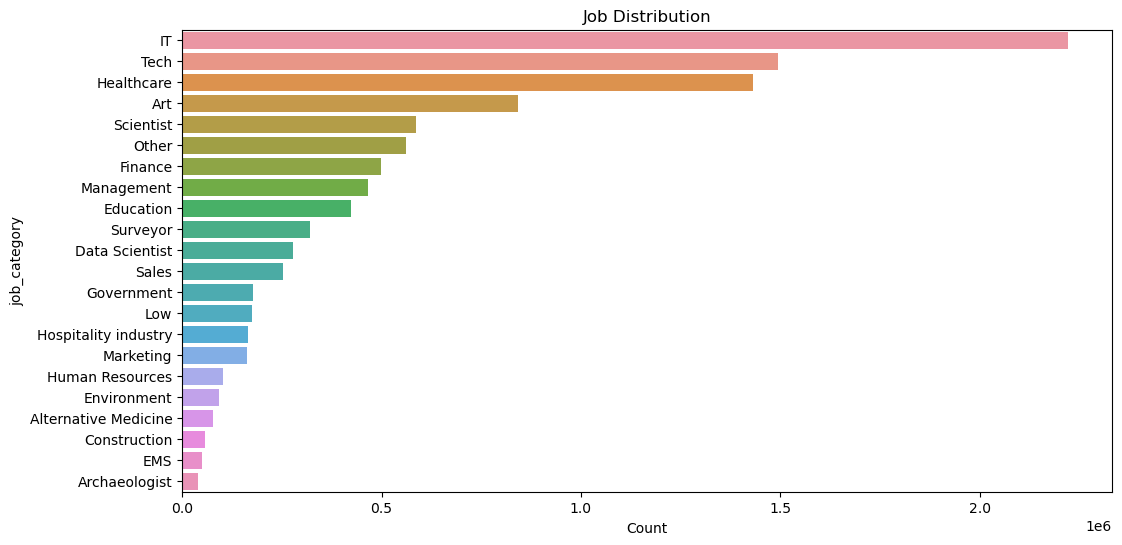

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index)  # Sort by frequency

plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('job_category')
plt.show()


In [430]:
df.to_pickle('df_3.1.25_4.pkl')

In [431]:
df = pd.read_pickle('df_3.1.25_4.pkl')

category data

In [432]:
df['job_category'] = df['job_category'].astype('category')
df['state']=df['state'].astype('category')

In [433]:
df['profile']=df['profile'].str.replace('_',' ')

-------------------

In [447]:
df['profile'] = df['profile'].str.replace('.json', '')
df['profile']

# Function to extract "adults" or "young_adults"
def extract_category(filename):
    if 'young adults' in filename:
        return '0'
    else:
        return '1'

# Apply the function to create a new column
df['age_category'] = df['profile'].apply(extract_category)

In [448]:
df['age_category'].value_counts()

age_category
1    9257430
0    1220758
Name: count, dtype: int64

In [435]:
# Function to extract "urban" or "rural"
def extract_category(filename):
    if 'urban' in filename:
        return '0'
    else:
        return '1'

# Apply the function to create a new column
df['location'] = df['profile'].apply(extract_category)

In [436]:
# Function to extract "50up" or "2550"
def extract_category(filename):
    if '50up' in filename:
        return '1'
    else:
        return '0'

# Apply the function to create a new column
df['profile_category'] = df['profile'].apply(extract_category)

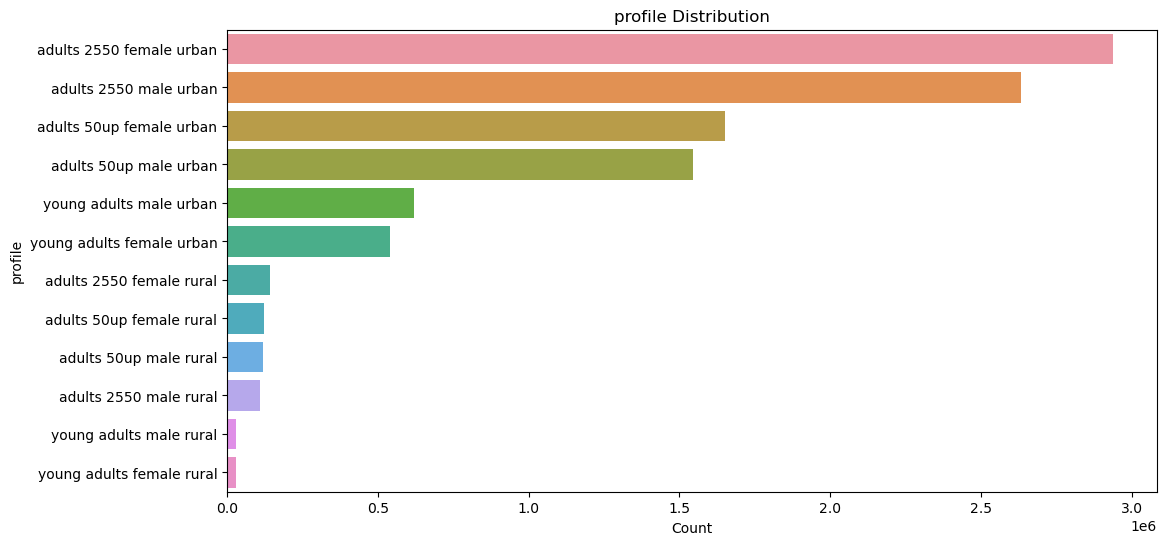

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='profile', order=df['profile'].value_counts().index)  # Sort by frequency

plt.title('profile Distribution')
plt.xlabel('Count')
plt.ylabel('profile')
plt.show()

In [438]:
df['profile']=df['profile'].astype('category')

In [449]:
df[['profile','profile_category', 'age_category', 'location']]

,profile,profile_category,age_category,location
0,young adults female urban,0,0,0
1,young adults female urban,0,0,0
2,young adults female urban,0,0,0
3,young adults female urban,0,0,0
4,young adults female urban,0,0,0
...,...,...,...,...
10478183,adults 50up male urban,1,1,0
10478184,adults 50up male urban,1,1,0
10478185,adults 50up male urban,1,1,0
10478186,adults 50up male urban,1,1,0


In [441]:
# Compute category frequencies
category_counts = df['category'].value_counts()

# Replace categories below the threshold with "Other"
df['category'] = df['category'].apply(lambda x: x if category_counts[x] >= 11000 else 'Other')

In [442]:
df['category'].value_counts()

category
shopping pos     2911942
personal care    2443754
shopping net     1729188
kids pets        1647786
travel           1104068
entertainment     362610
misc pos          254101
Other              24739
Name: count, dtype: int64

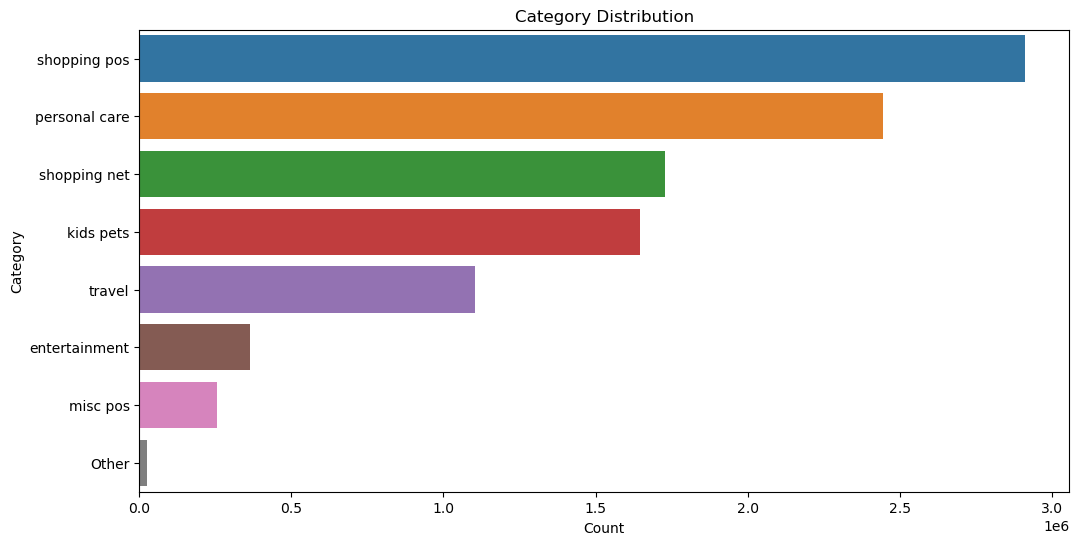

In [443]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)  # Sort by frequency

plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [444]:
for col in df:
    print(col)
    print(df[col].value_counts())

ssn
ssn
863 40 9402    1421
181 72 3161    1421
601 28 2159    1420
021 45 4377    1413
483 53 0433    1404
               ... 
539 35 0001       5
564 15 1743       5
680 94 2735       4
104 11 6963       4
235 48 4834       3
Name: count, Length: 18063, dtype: Int64
cc_num
cc_num
3511336354282257       1421
4934061264665          1421
4675154798156          1420
4700649300310256       1413
6011603074881389       1404
                       ... 
4339718551383             5
4463099297651905671       5
6590438242352388          4
4605956343180739203       4
3567931054187377          3
Name: count, Length: 18063, dtype: int64
first
first
Michael        235602
David          150442
Jennifer       141902
Robert         139557
Christopher    139454
                ...  
Mathew            228
Angie             218
Karla             214
Gilbert           211
Mercedes          202
Name: count, Length: 686, dtype: int64
last
last
Smith        219562
Johnson      165757
Williams     145483
Brown

Changing values

In [450]:
df['gender']=df['gender'].astype(int)

In [451]:
df['location']=df['location'].astype(int)

In [452]:
df['age_category']=df['age_category'].astype(int)
df['profile_category']=df['profile_category'].astype(int)

In [453]:
df['gender'].value_counts()

gender
0    5423417
1    5054771
Name: count, dtype: int64

In [454]:
df.to_pickle('df_3.1.25_5.pkl')

In [348]:
# Aggregate the age groups
city_group_aggregation = df.groupby('city').size().reset_index(name='city_pop')

# city_group_aggregation

# Sort city_group_aggregation in ascending order and print the top 10
print(city_group_aggregation.sort_values(by='city_pop', ascending=False).head(14))

               city  city_pop
2047        Houston    105978
793         Chicago    102137
517        Brooklyn     89168
2547    Los Angeles     79899
2395      Las Vegas     62646
3933    San Antonio     57181
2792          Miami     56609
3083  New York City     51929
511           Bronx     49643
3461   Philadelphia     48670
1060         Dallas     47546
919        Columbus     45299
3467        Phoenix     42714
3908    Saint Louis     41193


In [198]:
df['city_category'].value_counts()

city_category
Other            9687439
Houston           105978
Chicago           102137
Brooklyn           89168
Los Angeles        79899
Las Vegas          62646
San Antonio        57181
Miami              56609
New York City      51929
Bronx              49643
Dallas             47546
Columbus           45299
Phoenix            42714
Name: count, dtype: int64

In [197]:
# List of top 10 cities
top_cities = ['Houston', 'Chicago', 'Brooklyn', 'Los Angeles', 'Las Vegas', 
              'San Antonio', 'Miami', 'New York City', 'Bronx', 'philadelphia', 'Dallas' , 'Columbus', 'Phoenix', 'Saint louis']

df['city_category'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

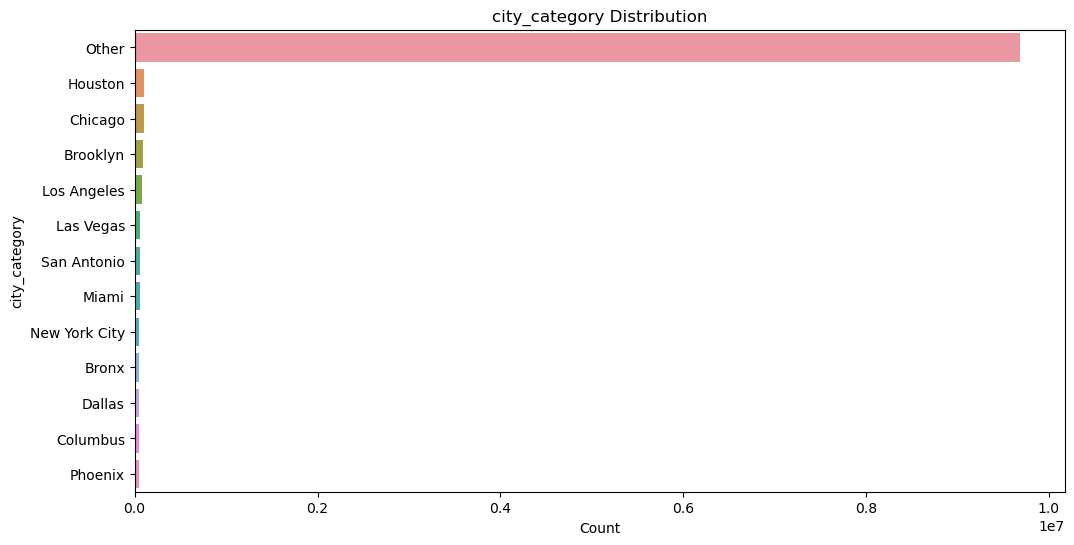

In [199]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='city_category', order=df['city_category'].value_counts().index)  # Sort by frequency

plt.title('city_category Distribution')
plt.xlabel('Count')
plt.ylabel('city_category')
plt.show()

-----------------

In [143]:
df['age'].value_counts()#reduce

age
31    1058
28    1057
23    1053
33    1037
36    1036
      ... 
83       6
88       3
85       3
86       1
87       1
Name: count, Length: 73, dtype: int64

#### Task

1-Create age groups <br> 2- Crate a countplot for the groups

### Age Groups

In [ ]:
# plot of age


In [144]:
# Categorize the ages into bins with labels
df['age_range'] = pd.cut(df['age'], bins=[0, 18, 24, 34, 44, 69, float('inf')], labels=['<18', '18-24', '25-34', '35-44', '45-69', '>70'], right=False)

In [145]:
# Aggregate the age groups
age_group_aggregation = df.groupby('age_range').size().reset_index(name='count')

age_group_aggregation


,age_range,count
0,<18,417
1,18-24,5091
2,25-34,9957
3,35-44,9477
4,45-69,11286
5,>70,761


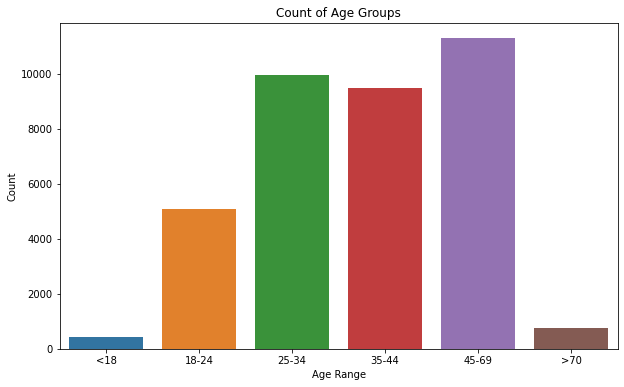

In [146]:
# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', data=df, order=['<18', '18-24', '25-34', '35-44', '45-69', '>70'])
plt.title('Count of Age Groups')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [147]:
df['sex'].value_counts()

sex
0    25252
1    11737
Name: count, dtype: int64

In [148]:
df_dummy=df['income']

<Axes: xlabel='income', ylabel='count'>

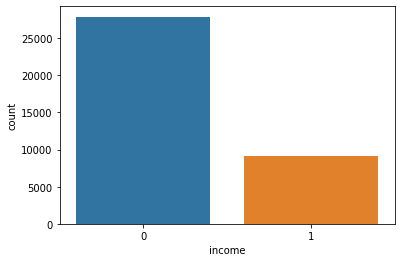

In [149]:
sns.countplot(df_dummy)

Saving Manipulated data

In [152]:
df.to_csv('final_income_copy')

Another option is Pickle file

# Pickle file

A pickle file in Python is used to serialize and deserialize Python objects. <br>Serialization (write binary) is the process of converting a Python object into a byte stream, which can then be written to a file or transmitted over a network. <br>Deserialization (read binary) is the reverse process, converting the byte stream back into a Python object.

In [154]:
df.to_pickle('mrg_df_after_data_prep_5.2.25.pkl')
df=pd.read_pickle('mrg_df_after_data_prep_5.2.25.pkl')

In [ ]:
import pickle
#Write a pickle file
with open('income.pkl', 'wb') as f:
    pickle.dump(df, f)

print("income dataset saved as a pickle file.")

In [ ]:
#Read a pickle file and load the data
with open('income.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [ ]:
loaded_data

# We got A flat file, Next to EDA